# D-exponent

D-exponent is an extrapolation of drilling parameters to get a trend while drilling into over-pressured zones. This method allows plotting of a normalized penetration rate(d-exp. vs depth) which is utilized to detect transition from normal pressure regime to abnormal formation pressure.

Formula

d = log(R/(60N))/log((12W)/(10^6*D))

where d= D-exponent ,R = rate of penetration(ft/hr)

N = rotary speed (rpm), W = weight on bit(lbs),

D = diameter of bit (in.)

Note: Modification of D-exponent, called “corrected D-exponent” can also be used for estimating the top of over pressured zone, which is more quantitative because it considers mud weight effects on drilling rate.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_excel(r'Documents\D-exp.xlsx',usecols='B:G')
df2=df.diff()  
df2=df2.rename(columns={'Depth(ft)':'change in depth(ft)'}) 
a=df2['change in depth(ft)']
df=df.join(a)
df['ROP(ft/hr)']=df['change in depth(ft)']/df['Drilling time(hrs)']   
df['D-exponent']=np.log10(df['ROP(ft/hr)']/(60*df['N(rpm)']))/np.log10(12*df['WOB(lb)']/(1000000*df['Bit size(in.)']))
df

,Depth(ft),Bit size(in.),Drilling time(hrs),WOB(lb),N(rpm),Mud density(ppg),change in depth(ft),ROP(ft/hr),D-exponent
0,6000,8.500,4.72,35000,120,9.0,NaN,NaN,NaN
1,6500,8.500,4.85,35000,120,9.0,500.0,103.092784,1.411841
2,7000,8.500,6.50,35000,110,9.0,500.0,76.923077,1.480273
3,7500,8.500,7.58,35000,110,9.0,500.0,65.963061,1.531381
4,8000,8.500,11.21,30000,110,9.4,500.0,44.603033,1.580477
5,8500,7.875,10.87,30000,110,9.4,500.0,45.998160,1.609617
6,9000,7.875,12.69,30000,110,9.4,500.0,39.401103,1.659792
7,9500,7.875,14.28,30000,110,9.8,500.0,35.014006,1.698052
8,10000,7.875,6.49,30000,110,10.1,500.0,77.041602,1.442458
9,10200,7.875,7.61,30000,100,10.1,200.0,26.281209,1.760147


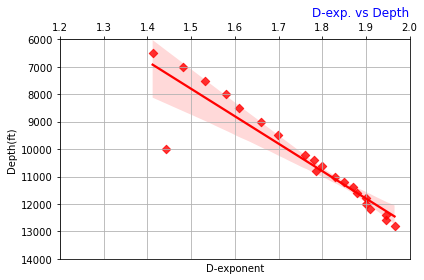

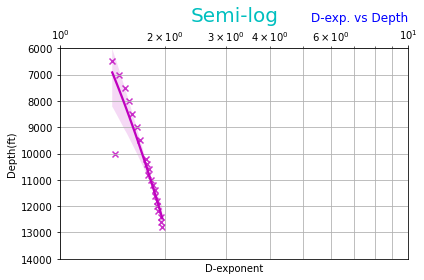

In [7]:
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False

plt.xlim(1.2,2)
plt.ylim(14000,6000)
sns.regplot(df['D-exponent'],df['Depth(ft)'],color='red',marker='D')
plt.title('D-exp. vs Depth',loc='right',color='b')
plt.tight_layout()
plt.grid()
plt.show()


plt.title('Semi-log',fontsize = 20,color='c')
plt.xlim(1,10)
plt.ylim(14000,6000)
plt.semilogx()   #Semilog plot
plt.grid(which='minor')
sns.regplot(df['D-exponent'],df['Depth(ft)'],color='m',marker='x')
plt.title('D-exp. vs Depth',loc='right',color='b')
plt.tight_layout()
plt.grid()
plt.show()


# Results

After analyzing the data in the data frame and visualizing it on graphs, it is clear that abnormality is encountered at the depth around 10,000 ft. and at this point the D-exponent is far from trend line.